Оцінювання даної роботи буде ураховувати якість ваших візуалізацій (вони можуть незначно відрізнятися від прикладів, але повинні змістовно відображати суть задачі) та опис отриманих вами результатів. При наявності ЛИШЕ візуалізацій без роз'яснень, завдання буде оцінена максимум у половину балів.

Під час виконання вам дозволено користуватися будь-якими зручними для вас Python бібліотеками для візуалізації.

# I. Receiving Data.

In [2]:
# cell for imports. All imports must go here.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

1. (2б) Для виконання цієї лабораторної роботи Вам необхідно скористатися вибіркою titanic ([train.csv](https://www.kaggle.com/c/titanic/data?select=train.csv)). Зчитайте його та збережіть його у змінну, щоб у подальшому її використати для візуалізацій. Виведіть інформацію про кожну колонку, її індекс, тип та кількість непропущених значень та перші кілька рядків датафрейму.


In [3]:
data_path = "D:/Admin/Desktop/Collage year 2/Python/pythonProject/train.csv"
train_df = pd.read_csv(data_path, sep=',', header=0)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
train_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# IІ. Data Visualization.

2. (10б) Створіть pie chart, який би показував співвідношення виживших до загиблих.


Overall: 891
Survived: 342
Died: 549


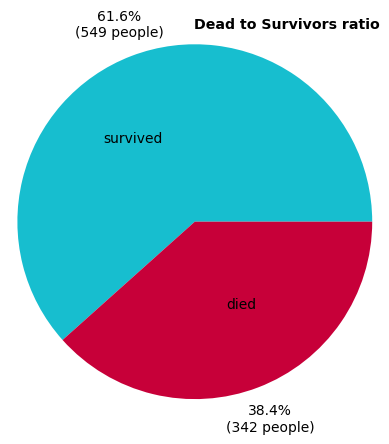

In [29]:
true_false_values = train_df["Survived"] == 1
people_survived = len(train_df[true_false_values])  # count of people who survived
people_tried = train_df["Survived"].count()         # count overall people
people_died = people_tried - people_survived        # count of people who died

print("\nOverall:", people_tried)
print("Survived:", people_survived)
print("Died:", people_died)

values = [people_died, people_survived]
plt.title(label="Dead to Survivors ratio", fontsize=10.2, weight="bold", loc="right")
plt.pie(values, labels=["survived", "died"], colors=["C70039", '#C70039'], 
        autopct=lambda pct: "{:1.1f}%\n({:d} people)".format(pct, int(pct / 100 * np.sum(values))), # pct - percentage, int(pct / 100 * np.sum(values)) - n people for this pct, :d is for an integer
        pctdistance=1.19, labeldistance=0.5, startangle=360, radius=1.2)
plt.show()


На діаграмі бачимо "Dead to Survivours ratio".
Вона поділена на 2 частини. Кожна частина має своє значення відсотковості + кількісні і підписана.
Вижило 62% людей(549).
Вмерло 38% людей(342).

3. (20б) Створіть bar chart, який би показував співвідношення загиблих до виживших для кожної статі. Для groupby використовуйте атрибут as_index=False.


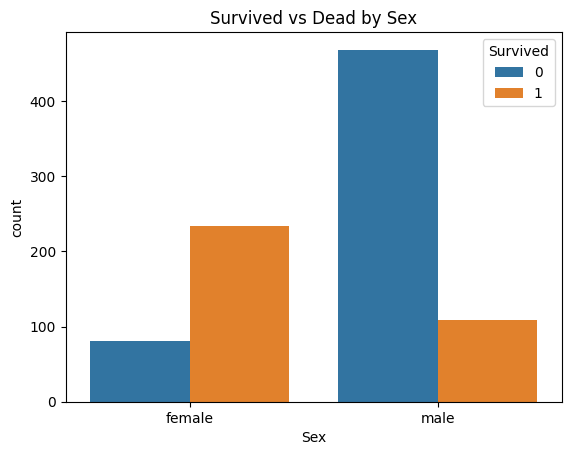

In [96]:
people_total = train_df.groupby("Sex", as_index=False).count()

females_total = people_total.at[0, "PassengerId"]
males_total = people_total.at[1, "PassengerId"]

true_false_values = train_df["Survived"] == 1
people_survived = train_df[true_false_values].groupby("Sex", as_index=False).count()

females_survived = people_survived.at[0, "PassengerId"]
males_survived = people_survived.at[1, "PassengerId"]

females_died = females_total - females_survived
males_died = males_total - males_survived

# just to see is everything adds up
print("People total:", females_total + males_total)
print("Females total:", females_total)
print("Males total:", males_total)

print("\nSurvived people total:", females_survived + males_survived)
print("Dead people total:", females_died + males_died)
print("Survived people + Dead people:", females_survived + males_survived + females_died + males_died)

print("\nFemales survived:", females_survived)
print("Males survived:", males_survived)

print("\nFemales died:", females_died)
print("Males died:", males_died)

People total: 891
Females total: 314
Males total: 577

Survived people total: 342
Dead people total: 549
Survived people + Dead people: 891

Females survived: 233
Males survived: 109

Females died: 81
Males died: 468


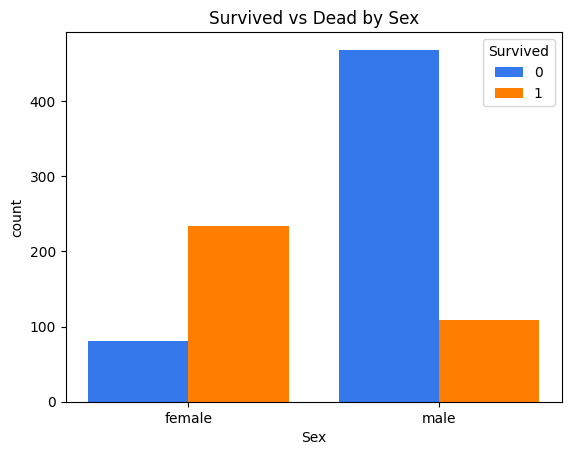

In [97]:
barWidth = 0.4
  
died_0 = [females_died, males_died] 
survived_1 = [females_survived, males_survived] 

bar1 = np.arange(len(died_0)) 
bar2 = [x + barWidth for x in bar1] 

plt.bar(bar1, died_0, color = "#3478EC", width = barWidth, label = "0") 
plt.bar(bar2, survived_1, color = "#FF7D00", width = barWidth, label = "1") 

plt.title(label="Survived vs Dead by Sex", fontsize=12.2)
plt.xlabel("Sex", fontsize = 10) 
plt.ylabel("count", fontsize = 10) 
plt.xticks([r + barWidth/2 for r in range(2)],
           ["female", "male"])
plt.legend(title = "Survived") 
plt.show()


Маємо візуалізацію даних про кількості людей, які загинули та вижили, розділену на 2 групи (female, male)
Кольорами зверху справа є дані про значення позначок
Також є заголовок, який реченням описує показане на малюнку нижче
Жінок винило в 3 рази більше ніж вмерло, хоча і було менше.
Чоговіків вмерло в 4-5 разів більше ніж вижило.

4. (20б) Відобразіть кількість пропущених значень в датасеті по кожній із змінних.

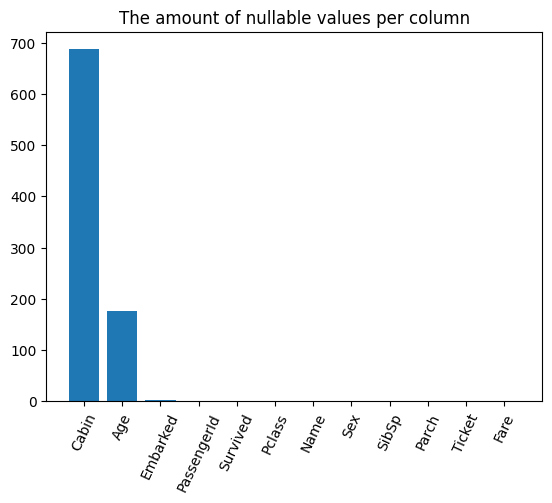

Text(0.5, 1.0, 'The amount of nullable values per column')

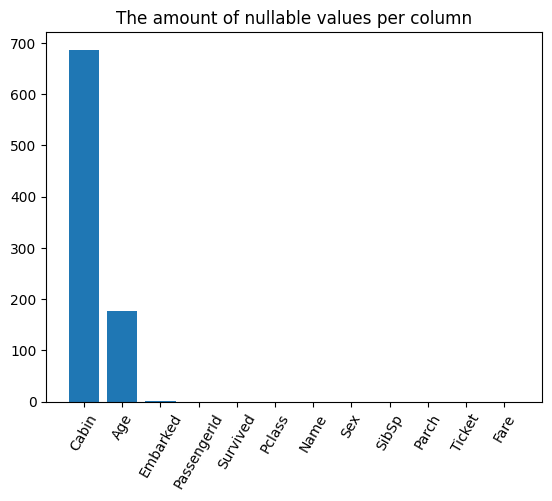

In [9]:
only_nulls = train_df.isnull().sum().sort_values(ascending=False)
plt.bar(only_nulls.index, only_nulls)
plt.xticks(rotation=60)
plt.title(label="The amount of nullable values per column", fontsize=12.2)


Маємо показану статистику того, скільки елементів з значенням null має кожен стовпчик нашого набору даних
Cabin, Age, Embarked мають null елементи.
Інші не мають зовсім.

5. (10б) Побудуйте наступний графік, дайте йому назву та опишіть, що власне на них відображається.

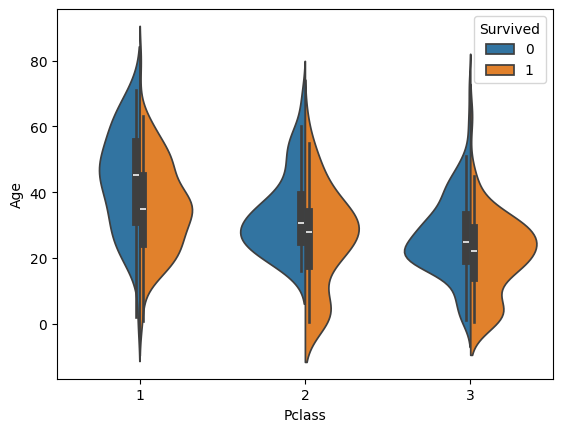

<Axes: xlabel='Pclass', ylabel='Age'>

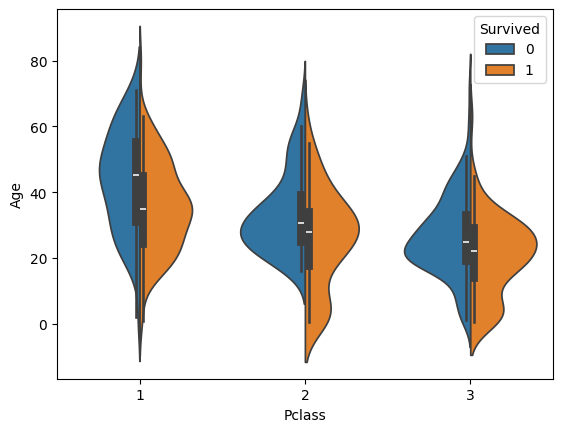

In [15]:
sns.violinplot(train_df, x=train_df.Pclass, y=train_df.Age, hue=train_df.Survived, split=True)

Одразу видно приблизну медіану
Зображено залежність Age до Pclass, розділено на 3 групи Pclass. На кожному під малюнку можна побачити 3 графіка, коже з яких показує інформаці про різні категорії Pclass. 
Pclass 1: більше смертей було в 50, живим більше було в 30. Зріст обох не був дуже різким
Pclass 2: більше смертей було в 30, живим більше було в 30. Зріст обох був більш різким ніж в категорії 1
Pclass 2: більше смертей було в 30, живим більше було в 30. Зріст обох був більш різким ніж в категорії 1. Майже нікого в категорії 3 не було старше 60

6. (13б) Побудуйте графік розподілу частот по віку пасажирів.


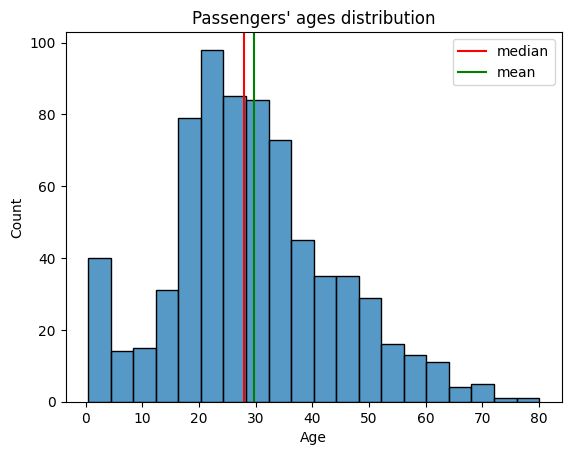

Text(0.5, 1.0, 'Passengers` ages distribution')

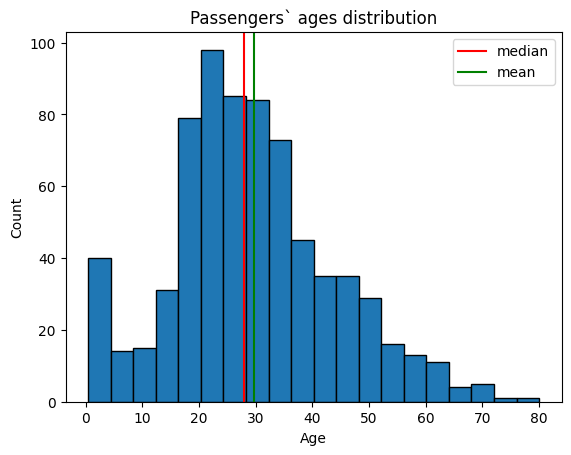

In [92]:
plt.hist(train_df.Age, 20, edgecolor="black")
plt.axvline(x=train_df.Age.median(), color='red', label="median")
plt.axvline(x=train_df.Age.mean(), color='green', label="mean")
plt.legend() 
plt.xlabel("Age", fontsize = 10) 
plt.ylabel("Count", fontsize = 10) 
plt.title("Passengers` ages distribution")

Маємо візуалізацію дистриб'юції віку пасажирів із використаного набору даних
Можемо побачити медіану та середнє значення
Також є чіткий заголовок малюнку.
Пасажири старше 40 починають різко зменшуватися.
Старше 80 немає зовсім.
Від 5-15 років в 2 рази менше нід в 0-5(приблизні числа)

7. (25б) Поставте бізнес-питання до даних. Дайте на нього відповідь за допомогою візуалізацій. Прокоментуйте отриману відповідь.

*питання до даних

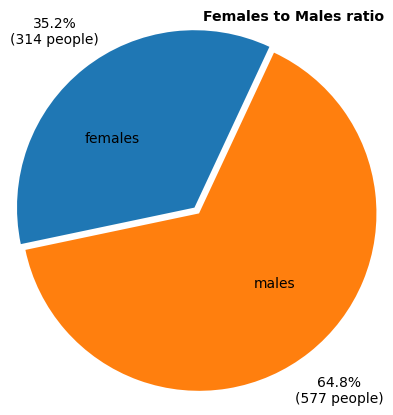

In [90]:
grouped_by_sex = train_df.groupby("Sex", as_index=False).count()
plt.pie([grouped_by_sex.at[0, "PassengerId"], grouped_by_sex.at[1, "PassengerId"]], labels=["females", "males"],
        explode=[0.05, 0], autopct=lambda pct: "{:1.1f}%\n({:d} people)".format(pct, int(pct / 100 * np.sum(values))),
        pctdistance=1.27, labeldistance=0.5, startangle=65, radius=1.2)
plt.title(label="Females to Males ratio", fontsize=10.2, weight="bold", loc="right")
plt.show()

Маємо  pie chart, який описує кількість жінок і чоловіків в нашому наборі даних.
Можна бачити відсотковість та кількість.
Жінок 35%(314).
Чоловіків 65%(577).